<a href="https://colab.research.google.com/github/LukaKKS/KKS_Project/blob/main/Using_Public_Data_A_Study_on_Travel_Behavior_in_Jeju_During_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공공데이터를 활용한 코로나 시기 제주 여행행태 연구

## 연구목적

본 연구는 2020년과 2021년에 한국을 강타한 COVID-19 라는 감염병이 제주도의 관광업계에 어떠한 변화를 가져왔는지 분석해보고자 한다.

## 데이터 설명

분석데이터는 크게 독립변수와 종속변수로 나누어 진행한다.

독립변수 -> 코로나 확진자 수 (질병청제공)

종속변수 -> 이동통신 방문자 수 / 신용카드 지출금액 / 내비게이션 검색건수 데이터(한국관광데이터랩 제공)



<총 데이터 셋>


1) 코로나 감염데이터(1개) - 코로나 확진자 수

2) 이동통신 방문자수(1개) - 방문객 수

3) 신용카드 지출금액(변수 10개) - 총소비/렌터카/항공수송/면세점/식음료/문화서비스/숙박업/대중교통/쇼핑/레저스포츠

4) 네비게이션 검색건수(변수 11개) - 전체/자연관광/역사관광/체험관광/문화관광/레포츠/쇼핑/음식/숙박/기타관광/여행업



##**1_지역별검색건수 데이터**##

### 글꼴설정

그래프로 표현 시 한글이 깨지는 경향이 있어 미리 글꼴을 다운받고 설정해주어야함.

In [ ]:
#kei

!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


### 분석을 위한 기본 Setting

Google Drive mount 방법도 있지만, 파일 업로드 방식을 사용함.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


### 일별로 수집 및 전처리

1) 상관관계분석과 단변량 선형회귀분석을 위하여  일별로 수집하고 전처리한 1년치자료

2) "2021년_지역별검색건수_통합본" / 2021 신용카드지출_통합본 / 2021_방문자 수 추이_통합본 / 2021_코로나데이터 를 가져옴.

3) 각 csv 자료의 컬럼들의 데이터를 리스트로 변환환뒤, 일별데이터 통합본 "final_data.csv"를 만드는 과정


In [ ]:


### 2021_지역별검색건수 데이터 로드후 자연관광 데이터 list로 변환
df = pd.read_csv('2021_지역별검색건수_통합본.csv', encoding='cp949')
df_nature = df[df['카테고리'] == '자연관광']
df_nature_list = df_nature['2021검색건수'].to_list()
df_nature_list_df = pd.DataFrame(df_nature_list)

Month = df_nature['기준년월'].to_list()  ### 날짜 데이터를 리스트로 변환
Month = pd.DataFrame(Month)


##2021_지역별검색건수 데이터에서 역사관광 데이터를 list로 변환
df_history = df[df['카테고리'] == '역사관광']
df_history_list = df_history['2021검색건수'].to_list()
df_history_list_df = pd.DataFrame(df_history_list)


####2021_지역별검색건수 데이터에서 체험관광 데이터를 list로 변환
df_experience = df[df['카테고리'] == '체험관광']
df_experience_list = df_experience['2021검색건수'].to_list()
df_experience_list_df = pd.DataFrame(df_experience_list)

####2021_지역별검색건수 데이터에서 체험관광 데이터를 list로 변환
df_culture = df[df['카테고리'] == '문화관광']
df_culture_list = df_culture['2021검색건수'].to_list()
df_culture_list_df = pd.DataFrame(df_culture_list)

####2021_지역별검색건수 데이터에서 레저스포츠 데이터를 list로 변환
df_lezer = df[df['카테고리'] == '레저스포츠']
df_lezer_list = df_lezer['2021검색건수'].to_list()
df_lezer_list_df = pd.DataFrame(df_lezer_list)


####2021_지역별검색건수 데이터에서 쇼핑 데이터를 list로 변환
df_shop = df[df['카테고리'] == '쇼핑']
df_shop_list = df_shop['2021검색건수'].to_list()
df_shop_list_df = pd.DataFrame(df_shop_list)

####2021_지역별검색건수 데이터에서 음식 데이터를 list로 변환식
df_food = df[df['카테고리'] == '음식']
df_food_list = df_food['2021검색건수'].to_list()
df_food_list_df = pd.DataFrame(df_food_list)

####2021_지역별검색건수 데이터에서 숙박 데이터를 list로 변환식
df_sleep = df[df['카테고리'] == '숙박']
df_sleep_list = df_sleep['2021검색건수'].to_list()
df_sleep_list_df = pd.DataFrame(df_sleep_list)

####2021_지역별검색건수 데이터에서 기타관광 데이터를 list로 변환식
df_etc = df[df['카테고리'] == '기타관광']
df_etc_list = df_etc['2021검색건수'].to_list()
df_etc_list_df = pd.DataFrame(df_etc_list)

####2021년 지역별 검색건수 데이터들을 리스트화 시킨거를 통합하는 과정

Nature_total = df_nature_list_df  #자연관광
History_total = df_history_list_df #역사관광
Experience_total = df_experience_list_df #체험관광
Culture_total = df_culture_list_df  #문화관광
Lezer_total = df_lezer_list_df  #레저스포츠
Shop_total = df_shop_list_df #쇼핑
Food_total = df_food_list_df  #음식
Sleep_total = df_sleep_list_df #숙박
Etc_total = df_etc_list_df  #기타관광

total_navi = pd.concat([Month,Nature_total,History_total,Experience_total,Culture_total,
                        Lezer_total,Shop_total,Food_total,Sleep_total,Etc_total],axis =1)

total_navi.columns =['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠','쇼핑','음식',
                     '숙박','기타관광']
total_navi.set_index('기준년월')
total_navi


Saving 2021_지역별검색건수_통합본.csv to 2021_지역별검색건수_통합본.csv


,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠,쇼핑,음식,숙박,기타관광
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178
...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943


##**2_신용카드 지출데이터**

### 분석을 위한 기본 Setting

Google Drive mount 방법도 있지만, 파일 업로드 방식을 사용함.



In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

### 업종별로 데이터 전처리

신용카드 금액의 경우 원활한 계산을 위해 to_list()함수를 사용하여 list형태로 변환.

In [ ]:

df = pd.read_csv('2021_신용카드지출_통합본.csv', encoding='cp949')

### 2021_신용카드지출 데이터 로드후 여행업 데이터 list로 변환
df_travel = df[df['중분류'] == '여행업']
df_travel_list = df_travel['2021지출액'].to_list()
df_travel_list_df = pd.DataFrame(df_travel_list)

##### 2021_신용카드지출 데이터 로드후 렌터카 데이터 list로 변환
df_rent = df[df['중분류'] == '렌터카']
df_rent_list = df_rent['2021지출액'].to_list()
df_rent_list_df = pd.DataFrame(df_rent_list)

##### 2021_신용카드지출 데이터 로드후 항공운송 데이터 list로 변환
df_airplane = df[df['중분류'] == '항공운송']
df_airplane_list = df_airplane['2021지출액'].to_list()
df_airplane_list_df = pd.DataFrame(df_airplane_list)

##### 2021_신용카드지출 데이터 로드후 면세점 데이터 list로 변환
df_tax = df[df['중분류'] == '면세점']
df_tax_list = df_tax['2021지출액'].to_list()
df_tax_list_df = pd.DataFrame(df_tax_list)

##### 2021_신용카드지출 데이터 로드후 문화서비스 데이터 list로 변환
df_cultureService = df[df['중분류'] == '문화서비스']
df_cultureService_list = df_cultureService['2021지출액'].to_list()
df_cultureService_list_df = pd.DataFrame(df_cultureService_list)

##### 2021_신용카드지출 데이터 로드후 식음료 데이터 list로 변환
df_drink = df[df['중분류'] == '식음료']
df_drink_list = df_drink['2021지출액'].to_list()
df_drink_list_df = pd.DataFrame(df_drink_list)


##### 2021_신용카드지출 데이터 로드후 숙박업(콘도+호텔) 데이터 list로 변환
df_condo = df[df['중분류'] == '콘도']
df_hotel = df[df['중분류'] == '호텔']
df_condo_list = df_condo['2021지출액'].to_list()
df_hotel_list = df_hotel['2021지출액'].to_list()
con_hotel_list = [x+y for x,y in zip(df_condo_list, df_hotel_list)]
con_hotel_list_df = pd.DataFrame(con_hotel_list)


##2021_신용카드지출 데이터 로드후 대중교통(육상운송+수상운송) 데이터 list로변환
df_land = df[df['중분류'] == '육상운송']
df_sea = df[df['중분류'] == '수상운송']
df_land_list = df_land['2021지출액'].to_list()
df_sea_list = df_sea['2021지출액'].to_list()
land_sea_list = [x+y for x,y in zip(df_land_list, df_sea_list)]
land_sea_list_df = pd.DataFrame(land_sea_list)

##2021_신용카드지출 데이터 로드후 쇼핑(면세점제외) --->관광기념품,레저용품쇼핑,대형쇼핑몰 데이터 list로변환
df_guide = df[df['중분류'] == '관광기념품']
df_lezer = df[df['중분류'] == '레저용품쇼핑']
df_market = df[df['중분류'] == '대형쇼핑몰']
df_guide_list = df_guide['2021지출액'].to_list()
df_lezer_list = df_lezer['2021지출액'].to_list()
df_market_list = df_market['2021지출액'].to_list()

guide_lezer_list = [x+y for x,y in zip(df_guide_list, df_lezer_list)]
guide_lezer_market_list = [x+y for x,y in zip(guide_lezer_list, df_market_list)]
guide_lezer_market_list_df = pd.DataFrame(guide_lezer_market_list)
guide_lezer_market_list_df

##2021_신용카드지출 데이터 로드후 레저스포츠(관광유원시설 + 골프장 +기타레저) 데이터 list로 변환
df_facilities = df[df['중분류'] == '관광유원시설']
df_golf = df[df['중분류'] == '골프장']
df_etc_lezer = df[df['중분류'] == '기타레저']

df_facilities_list = df_facilities['2021지출액'].to_list()
df_golf_list = df_golf['2021지출액'].to_list()
df_etc_lezer_list = df_etc_lezer['2021지출액'].to_list()
facilities_golf_list = [x+y for x,y in zip(df_facilities_list, df_golf_list)]
facilities_golf_lezer_list = [x+y for x,y in zip(facilities_golf_list, df_etc_lezer_list)]
facilities_golf_lezer_list_df = pd.DataFrame(facilities_golf_lezer_list)


####2021년 신용카드 지출내역 데이터들을 리스트화 시킨거를 통합하는 과정

Travel_total = df_travel_list_df   #여행업
Rent_total = df_rent_list_df   #렌터카
Airplane_total = df_airplane_list_df #항공운송
Tax_total = df_tax_list_df  # 면세점
CultureService = df_cultureService_list_df  #문화서비스
drink_total = df_drink_list_df  #식음료
Con_hotel_total = con_hotel_list_df   #숙박업(콘도+ 호텔)
Land_sea_total = land_sea_list_df   # 대중교통(육상운동 + 수상운송)
Guide_lezer_market_total = guide_lezer_market_list_df    #쇼핑(면세점제외) -> 관광기념품 + 레저용품쇼핑 + 대형쇼핑몰
Facilties_golf_total       = facilities_golf_lezer_list_df  # 레저스포츠(관광유원시설 + 골프장 + 기타레저)

total_daily = pd.concat([total_navi,Travel_total,Rent_total,Airplane_total,Tax_total,
                        CultureService, drink_total,Con_hotel_total,Land_sea_total,Guide_lezer_market_total,Facilties_golf_total],axis=1)

total_daily.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠','쇼핑','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑','레저스포츠']

total_daily.set_index('기준년월')
total_daily










Saving 2021_신용카드지출_통합본.csv to 2021_신용카드지출_통합본.csv


,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠,쇼핑,음식,숙박,기타관광,여행업,렌터카,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑,레저스포츠
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,929,30284,13254,228129,12846,595188,126832,2857.0,203125,61620
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,951,22891,10700,305124,13526,612857,113452,3996.0,248151,94853
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,1288,23336,12910,407852,10185,474648,138937,2108.0,195077,113527
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,559,24588,12452,208826,7614,377751,52310,2182.0,171722,97997
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,1225,23466,15684,172061,7029,386979,61606,1626.0,150200,104184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,8215,86712,74010,532653,31089,1153732,337049,NaN,261650,78136
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,8365,80357,65535,502802,32824,1224480,284191,NaN,275758,134567
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,9679,83503,68990,548017,31884,1288538,341675,NaN,290685,155112
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,10704,82947,68801,601774,38380,1351617,445283,NaN,315409,210253


## 3_지역방문자 수 추이 데이터

### 분석을 위한 기본 Setting

Google Drive mount 방법도 있지만, 파일 업로드 방식을 사용함.



In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

### 지역방문자 수 데이터 전처리

In [ ]:
### 2021_지역방문자 수 추이 로드후 데이터 list로 변환
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('2021_방문자 수 추이_통합본.csv',encoding='cp949')
df_OutPerson =df[df['방문자 구분'] == '외지인방문자(b)']
df_OutPerson_list = df_OutPerson['방문자 수'].to_list()
df_OutPerson_list_df = pd.DataFrame(df_OutPerson_list)
total_region = df_OutPerson_list_df
## 통합##
total_nofinal = pd.concat([total_daily, total_region],axis=1) ## 지역검색+ 신용카드 를 통합한테 total_daily이기 때문에 여기다 결합.
total_nofinal.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수']

total_nofinal.set_index('기준년월')
total_nofinal


### 코로나데이터 ####
import pandas as pd
from google.colab import files
uploaded = files.upload()
df_covid = pd.read_excel('2021_코로나데이터.xlsx')  #원본데이터는 기준일이 역순으로 숫자가 가고있기때문에 정렬을해줘야함
df_covid = df_covid.sort_values(by = '기준일') # 1월 1일부터로 정렬
df_covid_list = df_covid['확진자 수'].to_list() #확진자수 리스트로 변환
df_covid_list_df = pd.DataFrame(df_covid_list)

total_final = pd.concat([total_nofinal,df_covid_list_df],axis=1)
total_final.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수','확진자수']

total_final.set_index('기준년월')

# total_final = total_final.fillna(total_final['대중교통'].median()) # 대중교통에만 결측치가 존재하기 때문에 대중교통 의 중앙값으로 결측치 대체
# total_final.isna() # 대중교통에 결측이 NAN 41개

total_final



Saving 2021_방문자 수 추이_통합본.csv to 2021_방문자 수 추이_통합본.csv


Saving 2021_코로나데이터.xlsx to 2021_코로나데이터.xlsx


,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,기타관광,...,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수,확진자수
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,...,13254,228129,12846,595188,126832,2857.0,203125,61620,85340,61753
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,...,10700,305124,13526,612857,113452,3996.0,248151,94853,89464,62573
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,...,12910,407852,10185,474648,138937,2108.0,195077,113527,82579,63230
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,...,12452,208826,7614,377751,52310,2182.0,171722,97997,76111,64250
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,...,15684,172061,7029,386979,61606,1626.0,150200,104184,73574,64964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,...,74010,532653,31089,1153732,337049,NaN,261650,78136,186011,611650
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,...,65535,502802,32824,1224480,284191,NaN,275758,134567,188002,615514
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,...,68990,548017,31884,1288538,341675,NaN,290685,155112,201078,620921
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,...,68801,601774,38380,1351617,445283,NaN,315409,210253,209002,625955


## 4_전체 통합데이터

### 통합데이터 결측값 처리

위 과정에 있는 모든 데이터를 같은 형식으로 전처리 후에 하나의 데이터셋으로 통합하여 결측값을 찾아 결측치를 대체함.

In [ ]:
## 전체통합데이터에서 결측값 찾기

total_final.isna() # 대중교통에만  결측값이 들어있음
total_final = total_final.fillna(total_final['대중교통'].median()) # 대중교통에만 결측치가 존재하기 때문에 대중교통 의 중앙값으로 결측치 대체
total_final


,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,기타관광,...,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수,확진자수
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,...,13254,228129,12846,595188,126832,2857.0,203125,61620,85340,61753
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,...,10700,305124,13526,612857,113452,3996.0,248151,94853,89464,62573
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,...,12910,407852,10185,474648,138937,2108.0,195077,113527,82579,63230
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,...,12452,208826,7614,377751,52310,2182.0,171722,97997,76111,64250
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,...,15684,172061,7029,386979,61606,1626.0,150200,104184,73574,64964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,...,74010,532653,31089,1153732,337049,9856.0,261650,78136,186011,611650
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,...,65535,502802,32824,1224480,284191,9856.0,275758,134567,188002,615514
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,...,68990,548017,31884,1288538,341675,9856.0,290685,155112,201078,620921
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,...,68801,601774,38380,1351617,445283,9856.0,315409,210253,209002,625955


### 피어슨 상관계수 사용

변수 간의 선형 상관관계를 파악하여 변수들의 영향력을 파악하고자 함.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

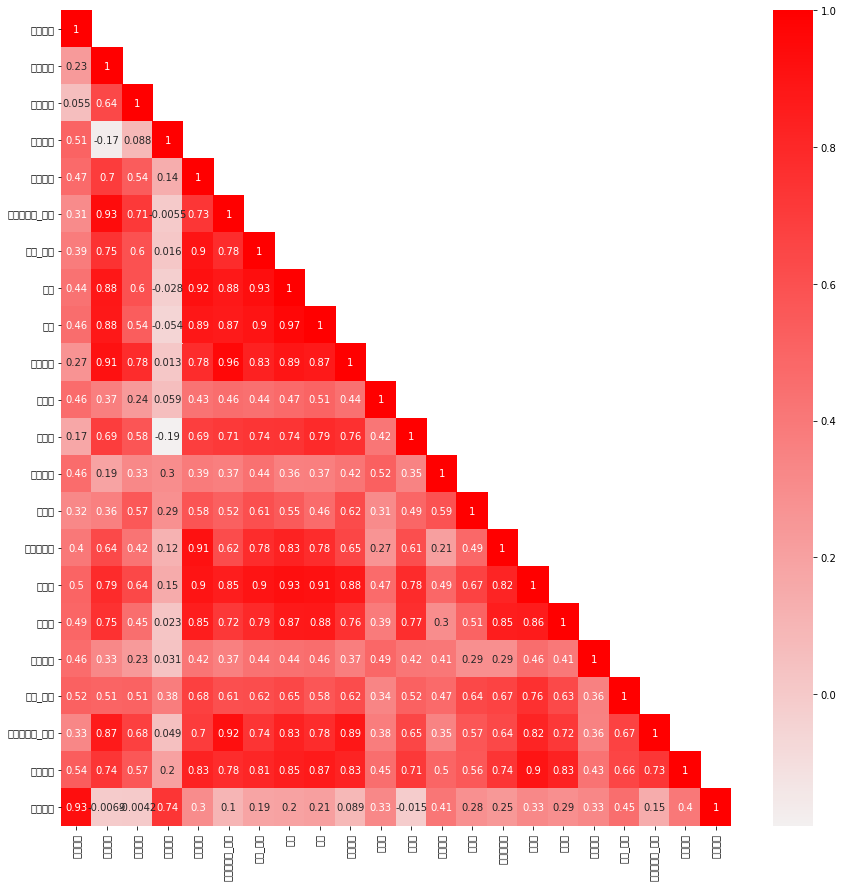

In [ ]:
import numpy as np
corr_M = total_final.corr(method ='pearson')
corr_M
mask = np.array(corr_M)
mask[np.tril_indices_from(mask)] =False

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트
font_name = fm.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', size=10).get_name()
plt.rc('font', family = font_name)

plt.figure(figsize=(15,15))
# sns.heatmap(data = total.corr(), annot=True,
# fmt = '.2f', linewidths=.5, cmap='Blues',
# vmin = -1 , vmax =1)

sns.heatmap(corr_M,
            cmap = sns.light_palette("red",as_cmap = True),
            annot = True,
            mask = mask)

plt.show()

### 상관계수가 높은 변수 나열

상관계수가 높은 변수 순서 들로 나열함으로써, 숙박-음식이 가장 상관관계가 높음을 알수있음.

In [ ]:
s = corr_M.unstack()
s

df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')


### 선형 회귀분석 OLS

종속변수와 독립변수를 가지고 statsmodels에서 제공해주는 ols(Ordinary Least Square) 를 사용하여 독립변수와 종속변수간의 관계를 파악하기위함.

In [ ]:
from statsmodels.formula.api import ols
# !pip install statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import files
# uploaded = files.upload()
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('total_data.csv',encoding = 'cp949')

df['Intercept'] =1
dfx = df[['자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수']]
dfy = df['확진자수']

normalization_df = (df-df.mean()/ df.std())
normalization_df.head()


#### 종속변수를 dfx, 독립변수를 dfy 즉 확진자수로 하여 모델을 fit.
# def get_model1(seed):
#     df_train_1, df_test_1 = train_test_split(df, test_size=0.5, random_state=seed)

#     model = sm.OLS.from_formula('식음료 ~  확진자수' , data=df_train_1)
#     return df_train_1, df_test_1, model.fit()


# df_train_1, df_test_1, result1 = get_model1(3)
# print(result1.summary())


#### 종속변수를 dfy, 독립변수를 dfx 로하여  fit.
def get_model2(seed):
  df_train_2, df_test_2 = train_test_split(normalization_df,test_size=0.4, random_state = seed)
  model2 = sm.OLS.from_formula('확진자수 ~ 자연관광 + 역사관광 + 체험관광 + 문화관광 + 레저스포츠_네비 + 쇼핑_네비 + 음식 + 숙박 + 기타관광+ 여행업 + 렌터카 + 항공수송 + 면세점 + 문화서비스 + 식음료 + 숙박업 + 대중교통 + 쇼핑_카드 + 레저스포츠_카드 + 방문객수', data=df_train_2)
  return df_train_2, df_test_2, model2.fit()

df_train_2, df_test_2, result2 = get_model2(3)
print(result2.summary())

def calc_r2(df_test_2, result):
    target = df.loc[df_test_2.index].확진자수
    predict_test = result.predict(df_test_2)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test = []
for i in range(10):
    df_train_2, df_test_2, result2 = get_model2(i)
    test.append(calc_r2(df_test_2, result2))

print(test)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FileNotFoundError: ignored

In [ ]:
X = dfx

### VIF(분산팽창계수) 제거

올바른 회귀분석을 진행하기 위해선 VIF계수가 일정수준 높은변수를 제거해야함. VIF계수가 높으면 이 변수는 신뢰성을 잃기 때문이다.

In [ ]:
## 분산팽창계수(VIF) 로 다중공선 성을 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
list =[]

# 독립변수 갯수만큼 반복
for i in range(dfx.shape[1]):
  v = variance_inflation_factor(dfx.values, i)
  list.append(v)

vif['독립변수명'] = dfx.columns
vif['VIF'] = list

vif



,독립변수명,VIF
0,자연관광,341.232684
1,역사관광,32.053231
2,체험관광,7.761325
3,문화관광,339.817242
4,레저스포츠_네비,350.757603
5,쇼핑_네비,219.343218
6,음식,943.271939
7,숙박,799.885846
8,기타관광,575.321173
9,여행업,9.253277


In [ ]:
 ### 1차 높은 계수의 VIF 제거


dfx_modify=dfx.drop(['음식','숙박','기타관광'],axis = 1 )
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx_modify.values, i) for i in range(dfx_modify.shape[1])]
vif["독립변수명"] = dfx_modify.columns
vif

,VIF Factor,독립변수명
0,187.919201,자연관광
1,22.916678,역사관광
2,7.261950,체험관광
3,239.360337,문화관광
4,264.179663,레저스포츠_네비
5,164.259035,쇼핑_네비
6,8.945719,여행업
7,35.526661,렌터카
8,31.179966,항공수송
9,35.826241,면세점


In [ ]:
def get_model3(seed):
  df_train_3, df_test_3 = train_test_split(df,test_size=0.4, random_state = seed)
  model3 = sm.OLS.from_formula('확진자수 ~ 역사관광 +체험관광+문화관광 +레저스포츠_네비 + 쇼핑_네비 + 여행업 + 렌터카 + 항공수송 + 면세점 + 문화서비스 + 식음료 + 숙박업 + 대중교통+ 쇼핑_카드+레저스포츠_카드+방문객수 ', data=df_train_3)
  return df_train_3, df_test_3, model3.fit()


df_train_3, df_test_3, result3 = get_model3(3)
print(result3.summary())

def calc_r3(df_test_3, result):
    target = df.loc[df_test_3.index].확진자수
    predict_test = result.predict(df_test_3)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test = []
for i in range(10):
    df_train_3, df_test_3, result3 = get_model3(i)
    test.append(calc_r3(df_test_3, result3))

print(test)


                            OLS Regression Results                            
Dep. Variable:                   확진자수   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     52.13
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.20e-62
Time:                        17:58:56   Log-Likelihood:                -2731.7
No. Observations:                 219   AIC:                             5497.
Df Residuals:                     202   BIC:                             5555.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.228e+05   3.33e+04     -3.692      0.0

In [ ]:
normalization_df = (df-df.mean())/ df.std()
normalization_df.head()

,Unnamed: 0,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,...,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수,확진자수,Intercept
0,-1.724944,-1.642152,-1.321436,-0.846557,0.449372,-1.814878,-1.843486,-2.095426,-1.841809,-1.778774,...,-1.868209,-1.432916,-1.956363,-1.751345,-1.543171,-0.952862,-2.256470,-2.512911,-1.098637,NaN
1,-1.715466,-1.639258,-1.363951,-0.559164,0.518706,-1.702056,-1.616735,-1.599726,-1.832683,-2.181783,...,-1.415576,-1.370533,-1.897479,-1.888946,-1.256766,-0.330704,-1.822784,-2.378467,-1.092889,NaN
2,-1.705989,-1.636363,-1.736137,-1.192735,-0.357432,-2.203740,-1.871829,-2.606239,-2.341881,-2.665799,...,-0.811665,-1.677038,-2.358073,-1.626856,-1.731509,-1.064067,-1.579090,-2.602921,-1.088283,NaN
3,-1.696511,-1.633468,-1.980417,-1.460533,-0.590648,-2.658790,-2.078172,-2.789104,-2.791670,-2.724866,...,-1.981687,-1.912903,-2.680991,-2.517737,-1.712901,-1.386781,-1.781755,-2.813781,-1.081132,NaN
4,-1.687033,-1.630574,-2.188669,-1.708736,-0.798652,-2.551233,-2.190413,-2.931164,-2.865200,-2.795410,...,-2.197818,-1.966571,-2.650238,-2.422136,-1.852709,-1.684166,-1.701015,-2.896488,-1.076126,NaN


In [ ]:
 ### 2차 높은 계수의 VIF 제거

dfx_modify=dfx.drop(['음식','숙박','기타관광','식음료','자연관광','레저스포츠_네비','문화관광','쇼핑_네비','방문객수','숙박업'],axis = 1 )
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx_modify.values, i) for i in range(dfx_modify.shape[1])]
vif["독립변수명"] = dfx_modify.columns
vif

,VIF Factor,독립변수명
0,17.778100,역사관광
1,5.074484,체험관광
2,8.043000,여행업
3,22.769157,렌터카
4,23.871273,항공수송
5,28.297762,면세점
6,19.835611,문화서비스
7,8.994323,대중교통
8,45.192670,쇼핑_카드
9,32.944038,레저스포츠_카드


In [ ]:
from sklearn.linear_model import Ridge

X = dfx
y = dfy

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

model_ridge = Ridge().fit(X_train,y_train)
print("훈련세트 점수: {:.3f}".format(model_ridge.score(X_train,y_train)))
print("테스트세트 점수 : {:.3f}".format(model_ridge.score(X_test,y_test)))




NameError: ignored

In [ ]:
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# 한글 폰트
font_name = fm.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', size=10).get_name()
plt.rc('font', family = font_name)

ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])
#plt.plot(data_history_final['기준년월'], data_history_final[['2020년 역사관광지 구성비(단위: %)', '2021년 역사관광지 구성비(단위: %)']])

plt.plot(data_history_final['기준년월'], data_history_final['2020년 역사관광지 구성비(단위: %)'], label='2020년 역사관광지 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_history_final['기준년월'], data_history_final['2021년 역사관광지 구성비(단위: %)'], label='2021년 역사관광지 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('월',fontsize=14)